# logistic regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df['Outcome']  #target variable

X = df.drop('Outcome', axis=1) # Separating features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Sharing data

# traing and making model
model = LogisticRegression(max_iter=400)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # prediction

# see result
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7467532467532467

Confusion Matrix:
[[78 21]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [4]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


# use oversampling

In [5]:
from imblearn.over_sampling import SMOTE  
y = df['Outcome']  #target variable

X = df.drop('Outcome', axis=1) # Separating features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Sharing data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# traing and making model
model = LogisticRegression(max_iter=400)
#model.fit(X_train, y_train)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test) # prediction

# see result
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6948051948051948

Confusion Matrix:
[[68 31]
 [16 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.56      0.71      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154



# sin curve

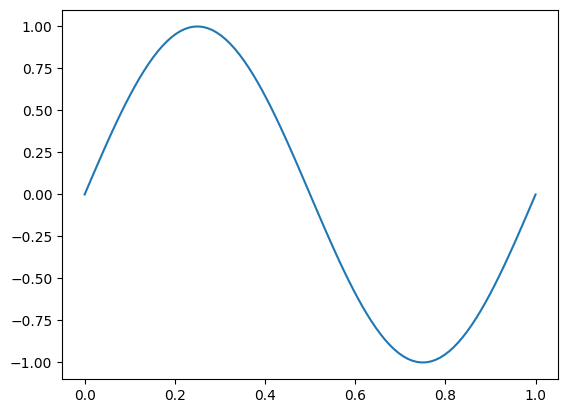

In [9]:
x = np.linspace(0,1,100)
y = np.sin(x * np.pi * 2)
plt.plot(x,y)

C:\Users\Upoma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


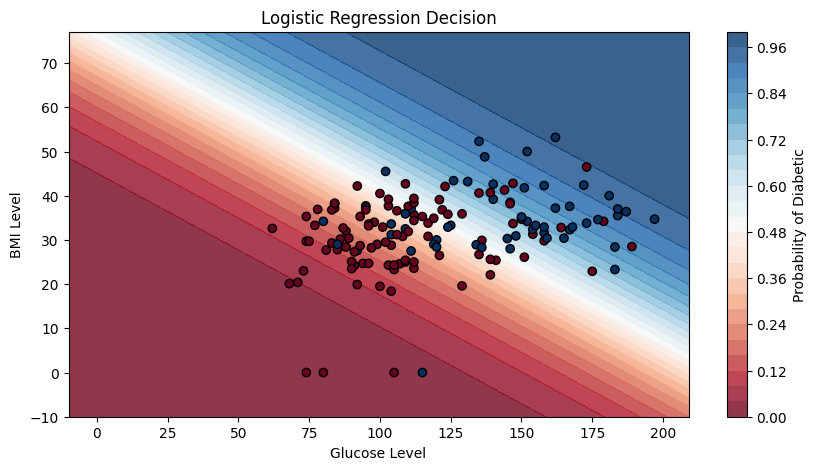

In [21]:
df = pd.read_csv("diabetes.csv")
X = df[['Glucose', 'BMI']]  #two features for 2D plotting
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=500)
model.fit(X_train_resampled, y_train_resampled)

# Prepare the grid to plot decision boundary
x_min, x_max = X['Glucose'].min() - 10, X['Glucose'].max() + 10
y_min, y_max = X['BMI'].min() - 10, X['BMI'].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]

# Predict probabilities for the grid points and reshape
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

#  use Plotting
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)  # create a filled contour plot
plt.colorbar(label="Probability of Diabetic")
plt.scatter(X_test['Glucose'], X_test['BMI'], c=y_test, cmap="RdBu", edgecolor='black')
plt.xlabel('Glucose Level')
plt.ylabel('BMI Level')
plt.title('Logistic Regression Decision')
plt.show()
